In [1]:
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import skimage.color
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math

from PIL import Image
from numpy import asarray
image_o = Image.open('Apple1.png').convert('1')
image_o.show()
new_image_o = Image.open('Apple1.png')

imggg=asarray(image_o)
imggg_=asarray(new_image_o)

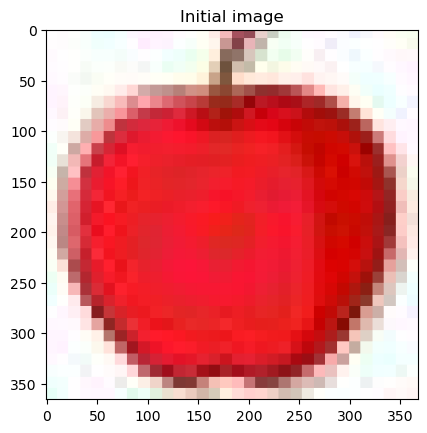

size = (366, 368, 4)


In [3]:
import matplotlib.pyplot as plt

def plot_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()


plot_image(imggg_, 'Initial image')
print("size =", imggg_.shape)


In [5]:
# Convert the raw pixel values to probability amplitudes

def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms_32_rgb = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms_32_rgb)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)


#we now normalize image and get coefficients in both horizontal and vertical directions

# Horizontal: Original image
h_norm_image_32_rgb = amplitude_encode(imggg)
print("Horizontal image normalized coefficients",h_norm_image_32_rgb)


print()
print()

# Vertical: Transpose of Original image
v_norm_image_32_rgb = amplitude_encode(imggg.T)
print("vertical image normalized coefficients",v_norm_image_32_rgb)

print()
print("size of 1d array",h_norm_image_32_rgb.shape)
print("size of 1d array",v_norm_image_32_rgb.shape)

Horizontal image normalized coefficients [0.00357828 0.00357828 0.00357828 ... 0.00357828 0.00357828 0.00357828]


vertical image normalized coefficients [0.00357828 0.00357828 0.00357828 ... 0.00357828 0.00357828 0.00357828]

size of 1d array (134688,)
size of 1d array (134688,)


In [6]:
#we require N=log(32*32) qubits 
#N=10

data_q_32_rgb = 10
ancillary_q_32_rgb = 1
total_q_32_rgb = data_q_32_rgb + ancillary_q_32_rgb

# Initialize the amplitude permutation unitary
Amp_permutation_unitary_32_rgb = np.identity(2**total_q_32_rgb)
print(Amp_permutation_unitary_32_rgb)
Amp_permutation_unitary_32_rgb=np.roll(Amp_permutation_unitary_32_rgb,1,axis=1)
print()
print()
print()
print("shift Amplitude permutation matrix by 1 unit to the right column wise")
print()
print(Amp_permutation_unitary_32_rgb)
print()
print("we will later use this for while applying hadamard operation to image coefficient vectors")
print()
print(Amp_permutation_unitary_32_rgb.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]



shift Amplitude permutation matrix by 1 unit to the right column wise

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]

we will later use this for while applying hadamard operation to image coefficient vectors

(2048, 2048)


In [7]:
# Creating the circuit for horizontal scan

qc_h_32_rgb = QuantumCircuit(total_q_32_rgb)
qc_h_32_rgb.initialize(h_norm_image_32_rgb, range(1, total_q_32_rgb))
qc_h_32_rgb.h(0)
qc_h_32_rgb.unitary(Amp_permutation_unitary_32_rgb, range(total_q_32_rgb))
qc_h_32_rgb.h(0)

display(qc_h_32_rgb.draw('mpl', fold=-1))


# Create the circuit for vertical scan
qc_v_32_rgb = QuantumCircuit(total_q_32_rgb)
qc_v_32_rgb.initialize(v_norm_image_32_rgb, range(1, total_q_32_rgb))
qc_v_32_rgb.h(0)
qc_v_32_rgb.unitary(Amp_permutation_unitary_32_rgb, range(total_q_32_rgb))
qc_v_32_rgb.h(0)

display(qc_v_32_rgb.draw('mpl', fold=-1))

# Combine both circuits into a single list
circ_list_32_rgb = [qc_h_32_rgb, qc_v_32_rgb]

QiskitError: 'Desired statevector length not a positive power of 2.'